# Bidirectional LSTM-CRF Models for Sequence Tagging (2015)

논문 링크: https://arxiv.org/pdf/1508.01991v1.pdf

## Abstract

본 논문에서는 시퀀스 태깅을 위한 다양한 LSTM(Long Short-Term Memory) 기반 모델을 제안합니다. 이러한 모델에는 LSTM 네트워크, 양방향 LSTM(BI-LSTM) 네트워크, CRF(Conditional Random Field) 레이어가 있는 LSTM(LSTM-CRF) 및 CRF 레이어가 있는 양방향 LSTM(BI-LSTM-CRF)이 포함됩니다. 여기에서의 작업은 양방향 LSTM CRF(BI-LSTM-CRF로 표시) 모델을 NLP 벤치마크 시퀀스 태깅 데이터 세트에 적용한 첫 번째 작업입니다. 양방향 LSTM 구성 요소 덕분에 BI-LSTM-CRF 모델이 과거 및 미래의 input feature을 모두 효율적으로 사용할 수 있음을 보여줍니다. CRF 레이어 덕분에 문장 수준의 태그 정보도 사용할 수 있습니다. BI-LSTM-CRF 모델은 POS, [Chunking](https://towardsdatascience.com/chunking-in-nlp-decoded-b4a71b2b4e24) 및 NER 데이터 세트에서 SOTA의 정확도를 달성할 수 있습니다. 또한 이전 관찰에 비해 견고하고 단어 임베딩에 대한 의존도가 적습니다.

## 1 Introduction

음성 태깅(POS), Chunking 및 개체명 인식(NER)을 포함한 시퀀스 태깅은 고전적인 NLP 작업이었습니다. 태거의 출력은 [다운 스트리밍 애플리케이션](https://www.ibm.com/docs/ru/imdm/11.6?topic=solution-integrating-upstream-downstream-systems)에 사용할 수 있습니다. 예를 들어, 사용자 검색 쿼리에 대해 훈련된 개체명 인식기를 사용하여 텍스트의 범위가 제품인지 식별할 수 있으므로 특정 제품 광고를 트리거할 수 있습니다. 또 다른 예는 이러한 태그 정보가 관련 웹페이지를 찾기 위해 검색 엔진에서 사용될 수 있다는 것입니다.


본 논문에서는 태깅 작업을 순서대로 수행하기 위해 다양한 신경망 기반 모델을 제안합니다. 이러한 모델에는 LSTM 네트워크, 양방향 LSTM 네트워크(BI-LSTM), CRF 레이어가 있는 LSTM 네트워크(LSTM-CRF), CRF 레이어가 있는 양방향 LSTM 네트워크(BILSTM-CRF)가 포함됩니다. 

따라서, 다음과 같이 요약될 수 있습니다.

1. NLP 태깅 데이터 세트에 대해 앞서 언급한 모델의 성능을 체계적으로 비교 

2. 양방향 LSTM CRF(BI-LSTM-CRF로 표시) 모델을 NLP 벤치마크 시퀀스 태깅 데이터 세트에 적용한 첫 번째 작업. 이 모델은 양방향 LSTM 구성 요소 덕분에 과거 및 미래의 input feature을 모두 사용할 수 있습니다. 또한 이 모델은 CRF 레이어 덕분에 문장 수준의 태그 정보를 사용할 수 있습니다. 이 모델은 POS, Chunking 및 NER 데이터 세트에 대한 SOTA에 도달할 수 있습니다.

3. BI-LSTM CRF 모델이 이전 관찰에 비해 견고하고 단어 임베딩에 대한 의존도가 적다는 것을 보여줍니다(Collobert et al., 2011). 워드 임베딩에 의존하지 않고 정확한 태깅 성능을 생성할 수 있습니다.

## 2 Models

이 섹션에서는 논문에서 사용한 LSTM, BI-LSTM CRF, LSTM-CRF, BILSTM-CRF 모델에 대해 설명합니다.

### 2.1 LSTM Networks

figure 1은 입력 레이어 x, 은닉 레이어 h 및 출력 레이어 y가 있는 RNN 구조(Elman, 1990)를 보여줍니다. 개채명 태깅 컨텍스트에서 x는 입력 기능을 나타내고 y는 태그를 나타냅니다. girue 1은 각 단어가 사람(PER), 위치(LOC), 조직(ORG) 및 기타(MISC)의 네 가지 개체 유형 중 하나로 태그 지정되거나 Other(O)으로 태그가 지정되는 개체명 인식 시스템을 보여줍니다. ```EU rejects German call to boycott British lamb```는 각각 ```B-ORG O B-MISC O O O B-MISC O O```로 태그가 지정되며, 여기서 B-, I- 태그는 엔터티의 시작 및 중간 위치를 나타냅니다.

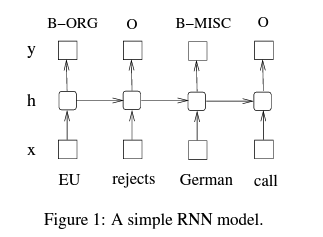

### 2.2 Bidirectional LSTM Networks

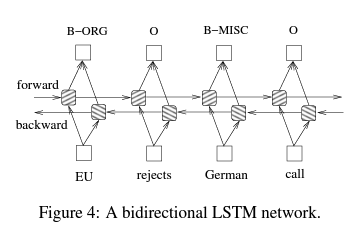

### 2.3 CRF networks

CRF는 일반적으로 더 높은 태깅 정확도를 생성할 수 있는 것으로 나타났습니다.

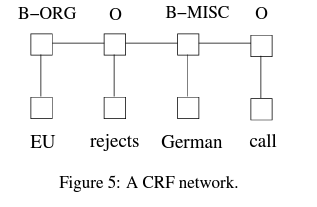

### 2.4 LSTM-CRF networks

LSTM 네트워크와 CRF 네트워크를 결합하여 figure 6과 같은 LSTM-CRF 모델을 만듭니다. CRF 레이어는 연속적인 출력 레이어를 연결하는 선으로 표시됩니다.

CRF 레이어는 state 전이 행렬을 매개변수로 가지고 있습니다. 이러한 레이어를 사용하면  효율적으로 과거과 미래 태그들로 현재 태그를 예측하는데 사용할 수 있습니다. 그리고 이것은 bidirectional LSTM 네트워크를 통해 과거 및 미래 input feature을 사용하는 것과 유사합니다.

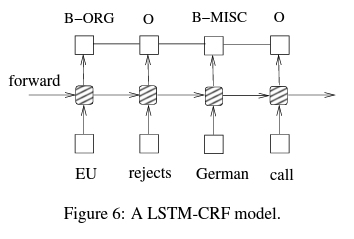

### 2.5 BI-LSTM-CRF networks

BI LSTM-CRF 모델은 LSTM-CRF 모델에서 사용된 과거 입력 특성 및 문장 수준 태그 정보 외에도 미래 입력 특성을 사용할 수 있습니다. 이러한 추가 feature은 태깅 정확도를 높일 수 있습니다.

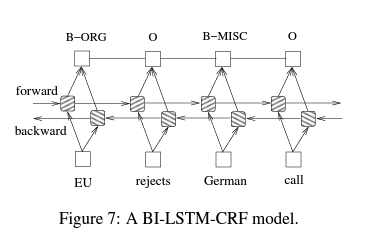

## 6 Conclusions

본 논문에서는 시퀀스 태깅을 위한 LSTM 네트워크 기반 모델의 성능을 체계적으로 비교했습니다. 여기서는 BI-LSTM-CRF 모델을 NLP 벤치마크 시퀀스 태깅 데이터에 적용한 첫 번째 작업을 제시했습니다. 이 모델은 POS, 청킹 및 NER 데이터 세트에서 SOTA(또는 거의)를 생성할 수 있습니다. 또한, 이 모델은 (Collobertetal., 2011)에 비해 견고하고 단어 임베딩에 대한 의존도가 적습니다. 워드 임베딩에 의존하지 않고도 정확한 태깅 정확도를 달성할 수 있습니다.

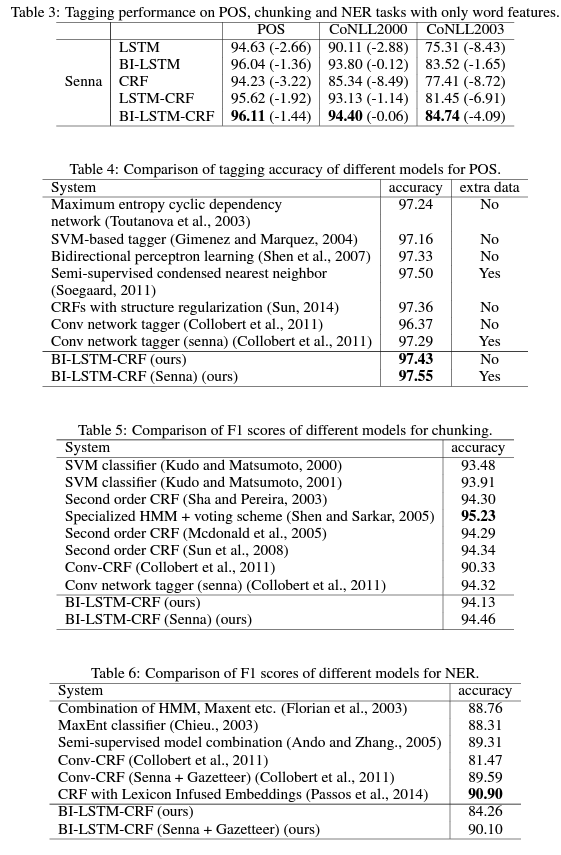